In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

anime = pd.read_csv('./data/anime.csv')
user = pd.read_csv('./data/rating.csv')

In [27]:
from matplotlib import font_manager
plt.rcParams['font.family'] = 'Malgun Gothic'

### anime EDA

In [28]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [29]:
anime.head(2)
anime.shape

(12294, 7)

anime 결측치 확인먼저

In [30]:
print(anime.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [31]:
print(anime[anime.isnull().any(axis=1)])

       anime_id                                               name  \
2844      33242          IS: Infinite Stratos 2 - Infinite Wedding   
3541      33589                                      ViVid Strike!   
6040      29765                                  Metropolis (2009)   
6646      32695                                       Match Shoujo   
7018      33187                                   Katsudou Shashin   
...         ...                                                ...   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12279     34491                       Sagurare Otome The Animation   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                              genre     type episodes  rating  members  
2844                            NaN  Special        1    7.15     6604  
3541         

In [32]:
anime = anime.dropna()

# 결측치가 제거 후 확인
print(anime.isnull().sum())

anime.shape # 292개 결측치 제거확인

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


(12017, 7)

### rating.csv EDA

In [33]:
user.info()
user.tail(10)
user["rating"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [34]:
print(user.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [35]:
user = user[user["rating"] != -1]
user["rating"].unique()

array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

### 중복값 제거(duplicated)

In [36]:
user = user.drop_duplicates(['user_id', 'anime_id'])

In [37]:
user.shape

(6337234, 3)

In [38]:
# 유저별 rating 분포 찍어보기
user[user["rating"] == 10].shape[0]

955714

In [39]:
'''
rating = 1 :16649개
rating = 2 :23150개
rating = 3 :41453개
rating = 4 :104291개
rating = 5 :282806개
rating = 6: 637775개
rating = 7 : 1375287개
rating = 8 : 1646019개
rating = 9 : 1254096개
rating = 10 : 955715개'
'''

"\nrating = 1 :16649개\nrating = 2 :23150개\nrating = 3 :41453개\nrating = 4 :104291개\nrating = 5 :282806개\nrating = 6: 637775개\nrating = 7 : 1375287개\nrating = 8 : 1646019개\nrating = 9 : 1254096개\nrating = 10 : 955715개'\n"

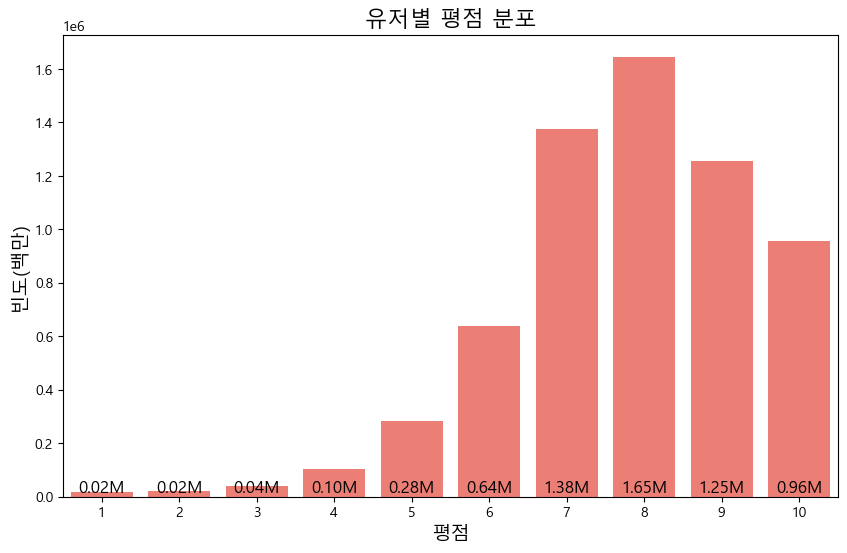

In [40]:
# user별 rating 평균분포 
rating_counts = user['rating'].value_counts().sort_index()

rating_in_million = rating_counts / 1e6

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='#FF6F61')

plt.title('유저별 평점 분포', fontsize=16)
plt.xlabel('평점', fontsize=14)
plt.ylabel('빈도(백만)', fontsize=14)

# 각 막대 위에 값 추가 (백만 단위로 표시)
for i, v in enumerate(rating_in_million.values):
    plt.text(i, v + 0.02, f'{v:.2f}M', ha='center', va='bottom', fontsize=12)

plt.show()

데이터 merge

In [41]:
df = pd.merge(user, anime, on='anime_id', how='inner')

In [48]:
df.shape

(6337139, 7)

In [42]:
# 합친 데이터의 info와 결측치 없는거 체크
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337139 entries, 0 to 6337138
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 435.1+ MB
user_id     0
anime_id    0
rating_x    0
name        0
genre       0
type        0
episodes    0
rating_y    0
members     0
dtype: int64


In [43]:
df.tail(2)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
6337137,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005
6337138,73516,8074,9,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [44]:
# 컬럼이름 바꿔주기
df.rename(columns={'rating_x': 'anime_rating', 'rating_y': 'user_rating'}, inplace=True)

df.head(2)


,user_id,anime_id,anime_rating,name,genre,type,episodes,user_rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.70,398660


### 원핫인코딩 (NAME 및 GENRE 변환 다시 해봐야함)

In [45]:
# 장르와 타입 모두 숫자로 인코딩
from sklearn.preprocessing import LabelEncoder

# genre 컬럼에 Label Encoding 적용
le_genre = LabelEncoder()
df['genre'] = le_genre.fit_transform(df['genre'])

# type 컬럼에 Label Encoding 적용
le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])

In [46]:
# NaN 값 처리
df = df.dropna()  # 또는 df.fillna(0)으로 결측치를 처리

# 숫자 컬럼만 선택
df = df.select_dtypes(include=['float64', 'int64'])

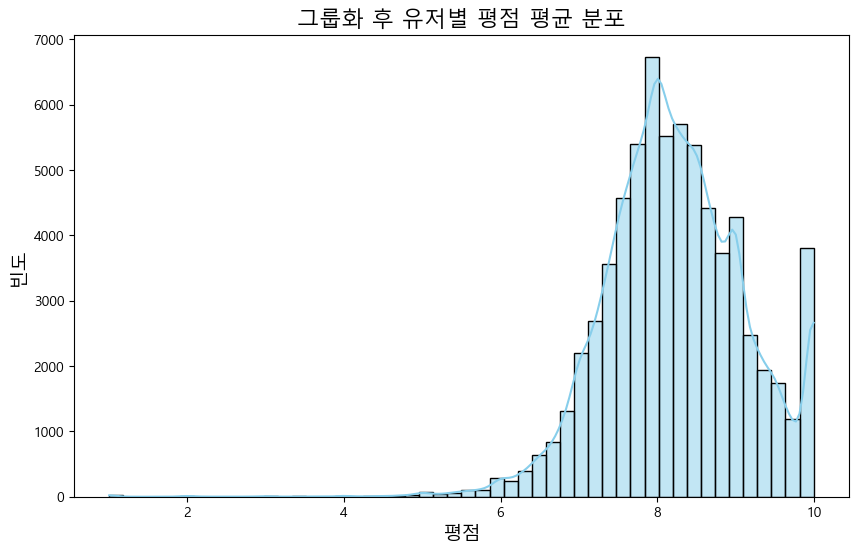

In [47]:
# user_id별로 그룹화해서 rating의 평균을 계산
group_user = user.groupby(['user_id']).mean().reset_index()
group_user['mean_rating'] = group_user['rating']

group_user.drop(['anime_id','rating'],axis=1, inplace=True)

group_user.head(5)


plt.figure(figsize=(10, 6))
sns.histplot(group_user['mean_rating'], bins=50, kde=True, color='skyblue')

plt.title('그룹화 후 유저별 평점 평균 분포', fontsize=16)
plt.xlabel('평점', fontsize=14)
plt.ylabel('빈도', fontsize=14)

plt.show()
